In [1]:
# Description: Plot Figure 7 (Random 2D topography with a K⁻² spectrum).
# Author:      André Palóczy
# E-mail:      paloczy@gmail.com
# Date:        March/2022

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from hdf5storage import loadmat
from cmocean.cm import balance

In [3]:
plt.close("all")

cmap = balance
ht = 1
htdimfac = 31.8 # [m]
N = 256
L = 2
dx = L/N
dy = dx
x = np.arange(0, N)
x, y = np.meshgrid(x*dx, x*dx - L/2)

fname_hrand = "../../code_simulations/hrand256Km2tk10filtnx32.mat"
h = loadmat(fname_hrand)["h"]
h = h*ht*0.5 # ht is rms in random topography. The factor 1/2 is the rms of sin(x)sin(y).
htdim = h*htdimfac
htdimmax = np.ceil(np.abs(htdim).max())

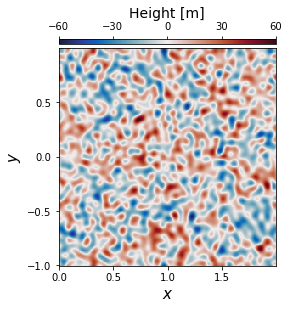

In [4]:
fig, ax = plt.subplots()
cs = ax.pcolormesh(x, y, htdim, vmin=-htdimmax, vmax=htdimmax, cmap=cmap)
dtk = 0.5
ax.set_xticks(np.arange(0, L+dtk, dtk))
ax.set_yticks(np.arange(-L/2, L/2+dtk, dtk))
ax.set_xlim(0, L)
ax.set_ylim(-L/2, L/2)
ax.axis("square")

cax = ax.inset_axes([0, 1.02, 1.0, 0.025])
cb = fig.colorbar(mappable=cs, cax=cax, orientation="horizontal")
cb.ax.xaxis.set_ticks_position("top"); cb.ax.xaxis.set_label_position("top")
cb.set_ticks([-htdimmax, -htdimmax/2, 0, htdimmax/2, htdimmax])
cb.set_label(r"Height [m]", fontsize=14, fontweight="normal")
ax.set_xlabel(r"$x$", fontsize=15, fontweight="black")
ax.set_ylabel(r"$y$", fontsize=15, fontweight="black")

fig.savefig("fig07.png", bbox_inches="tight")

plt.show()